In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import sklearn 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# df=pd.read_csv('car data.csv')


df=pd.read_excel('hourly-dataset_without-night-hrs.xlsx')

In [32]:
df

,Random,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Unnamed: 13
0,0.660692,2016-02-01,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00,NaN,277.0
1,0.417700,2016-02-01,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29,NaN,NaN
2,0.284691,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00,NaN,NaN
3,0.449221,2016-02-01,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75,NaN,NaN
4,0.314341,2016-02-01,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,0.503809,2017-10-28,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93,945.75,NaN,NaN
7532,0.505865,2017-10-28,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93,728.50,NaN,NaN
7533,0.317315,2017-10-28,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93,338.50,NaN,NaN
7534,0.417184,2017-10-28,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95,126.78,NaN,NaN


In [33]:
df.isnull()

,Random,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Unnamed: 13
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7532,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7533,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7534,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [34]:
df.isnull().sum()

Random                  0
Date                    0
Hour                    0
Cloud coverage          0
Visibility              0
Temperature             0
Dew point               0
Relative humidity       0
Wind speed              0
Station pressure        0
Altimeter               0
Solar energy            0
(Inverter)           7536
Unnamed: 13          7535
dtype: int64

In [35]:
df.describe()

,Random,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Unnamed: 13
count,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,0.0,1.0
mean,0.499878,11.500000,0.413692,9.220553,16.429748,9.869314,65.455673,10.111448,28.596245,30.023246,1793.606583,NaN,277.0
std,0.289457,3.452282,0.418636,2.002049,10.594733,9.616801,20.605739,5.680385,3.498832,0.236476,1486.162204,NaN,NaN
min,0.000031,6.000000,0.000000,0.000000,-18.930000,-20.540000,14.880000,0.000000,8.500000,21.880000,0.000000,NaN,277.0
25%,0.247019,8.750000,0.000000,10.000000,8.837500,3.277500,50.120000,6.180000,29.100000,29.910000,386.247500,NaN,277.0
50%,0.503609,11.500000,0.290000,10.000000,18.570000,11.150000,67.120000,9.225000,29.230000,30.030000,1467.375000,NaN,277.0
75%,0.750656,14.250000,0.920000,10.000000,25.142500,17.520000,82.240000,13.720000,29.340000,30.140000,3090.875000,NaN,277.0
max,0.999551,17.000000,1.000000,10.000000,34.010000,27.060000,100.000000,41.560000,29.970000,30.780000,4733.250000,NaN,277.0


In [36]:
df.tail()

,Random,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Unnamed: 13
7531,0.503809,2017-10-28,13,1.0,10.0,4.50,0.85,75.68,14.64,29.14,29.93,945.75,NaN,NaN
7532,0.505865,2017-10-28,14,1.0,10.0,4.72,-0.50,69.04,12.76,29.14,29.93,728.50,NaN,NaN
7533,0.317315,2017-10-28,15,1.0,10.0,4.18,-0.04,74.60,12.16,29.14,29.93,338.50,NaN,NaN
7534,0.417184,2017-10-28,16,1.0,10.0,3.77,0.00,75.64,8.28,29.16,29.95,126.78,NaN,NaN
7535,0.141815,2017-10-28,17,1.0,10.0,3.59,-0.79,73.72,8.40,29.18,29.97,20.49,NaN,NaN


In [37]:
df.columns

Index(['Random', 'Date', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature',
       'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure',
       'Altimeter', 'Solar energy', '(Inverter)', 'Unnamed: 13'],
      dtype='object')

In [38]:
df.drop('Unnamed: 13', inplace=True, axis=1)

In [39]:
df.drop('Random', inplace=True, axis=1)

In [40]:
df.drop('(Inverter)', inplace=True, axis=1)

In [41]:
df

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
1,2016-02-01,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
2,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
3,2016-02-01,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
4,2016-02-01,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75
...,...,...,...,...,...,...,...,...,...,...,...
7531,2017-10-28,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93,945.75
7532,2017-10-28,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93,728.50
7533,2017-10-28,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93,338.50
7534,2017-10-28,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95,126.78


In [42]:
df

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
1,2016-02-01,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
2,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
3,2016-02-01,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
4,2016-02-01,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75
...,...,...,...,...,...,...,...,...,...,...,...
7531,2017-10-28,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93,945.75
7532,2017-10-28,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93,728.50
7533,2017-10-28,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93,338.50
7534,2017-10-28,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95,126.78


In [43]:
import seaborn as sns


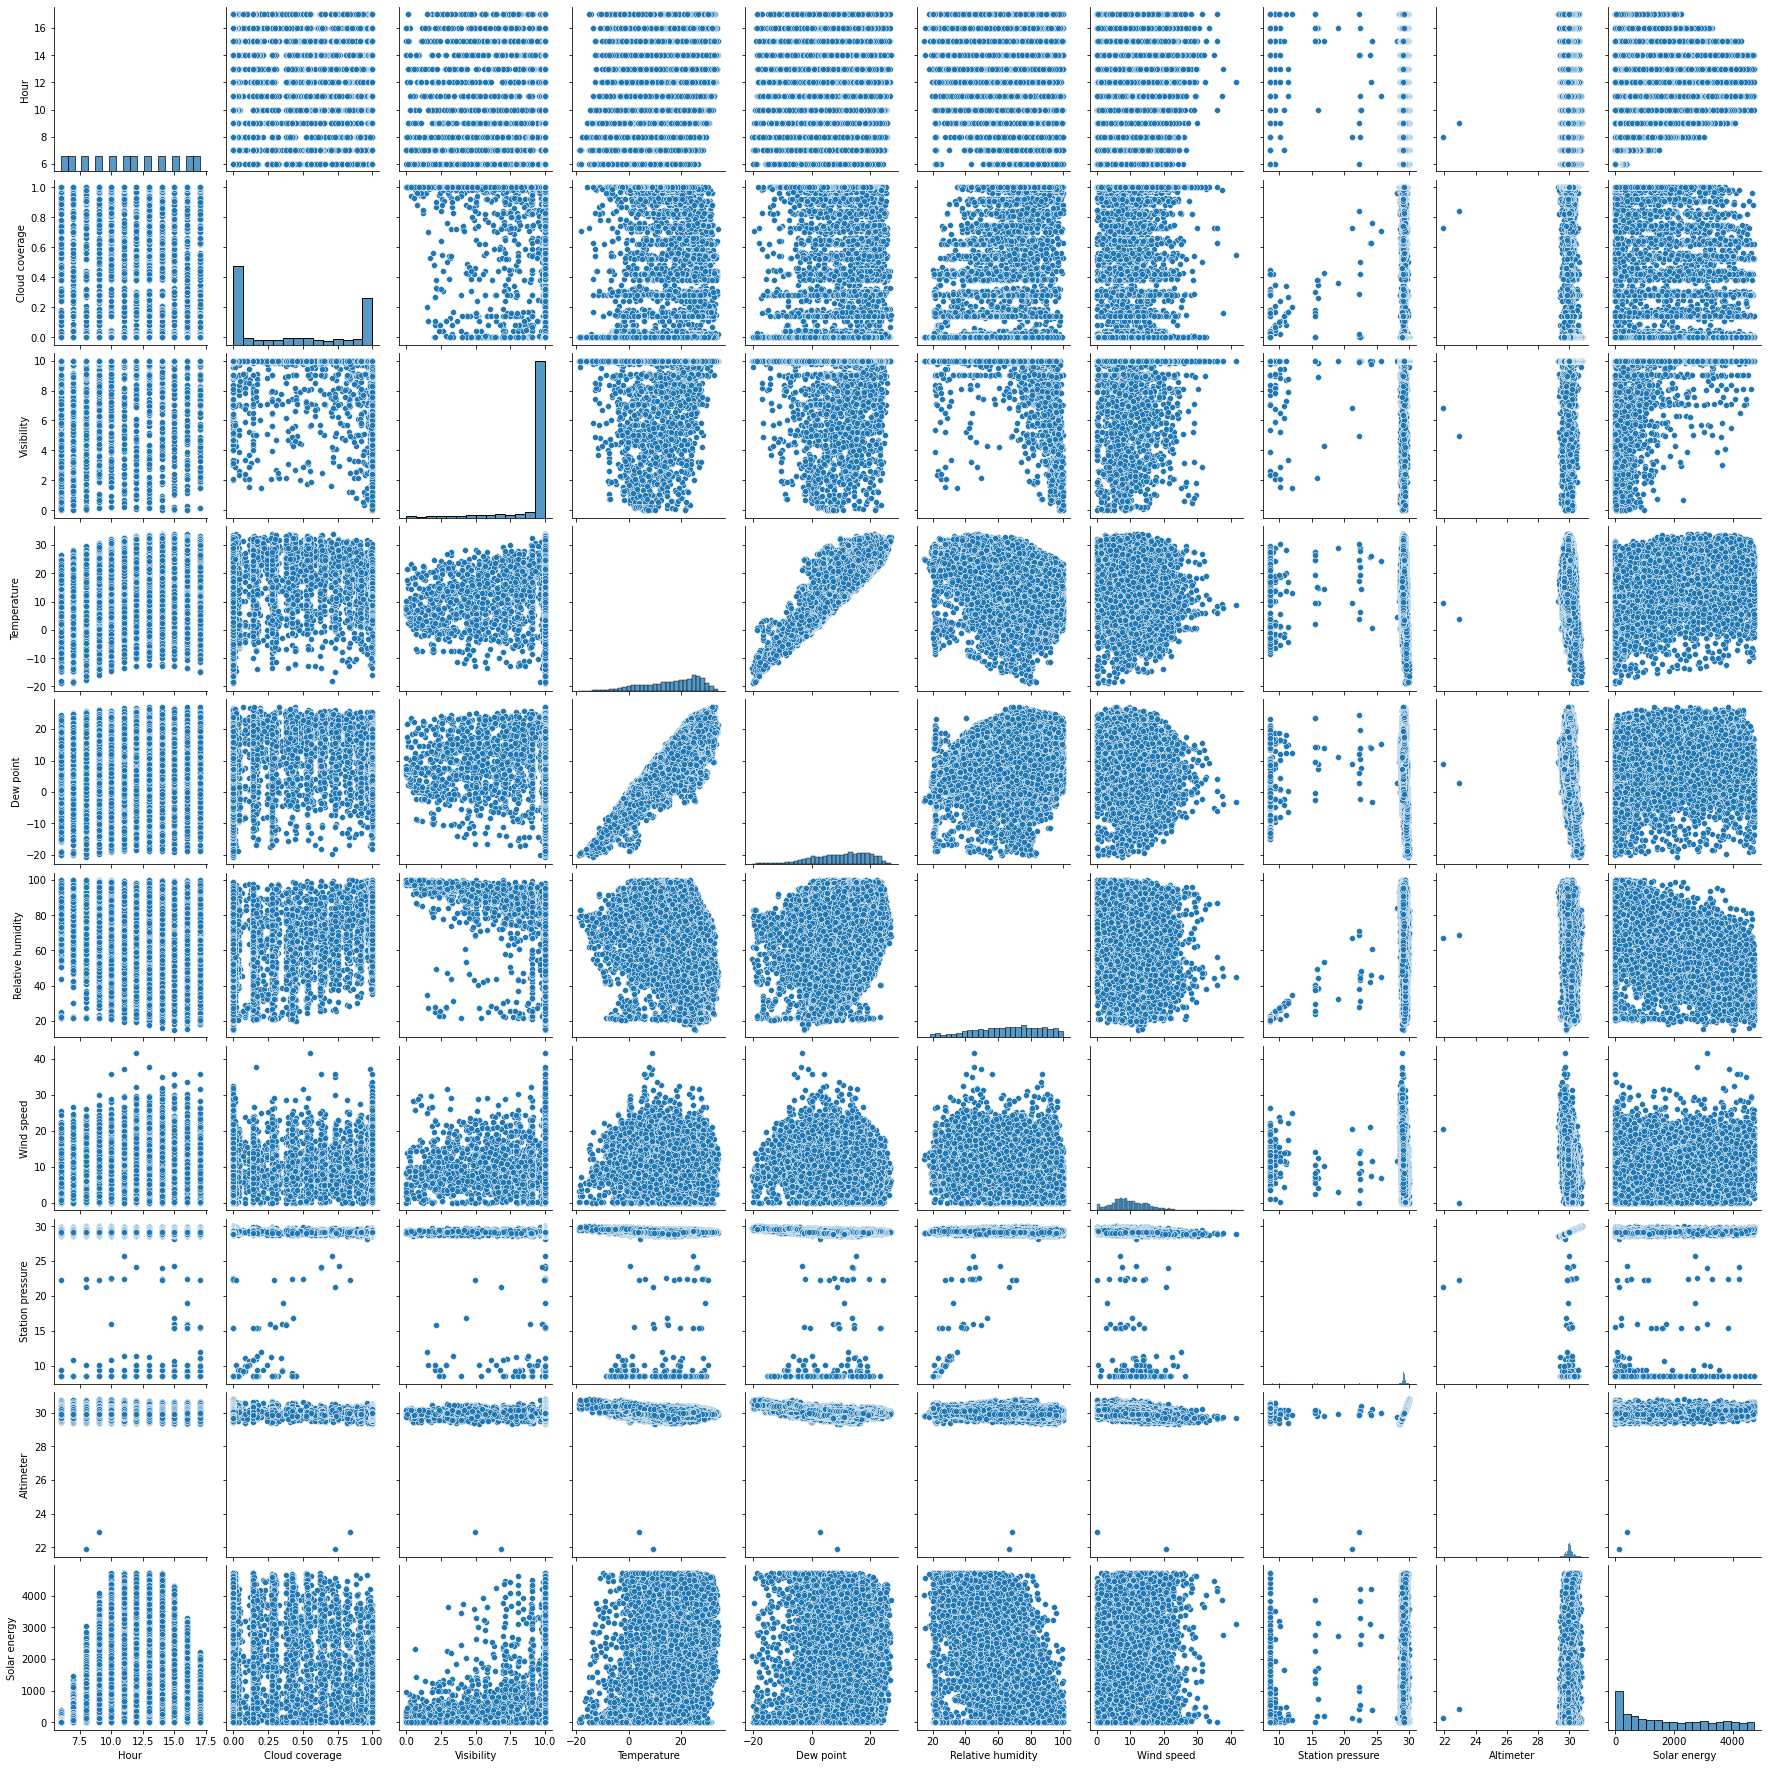

In [44]:
sns.pairplot(df)

<AxesSubplot:>

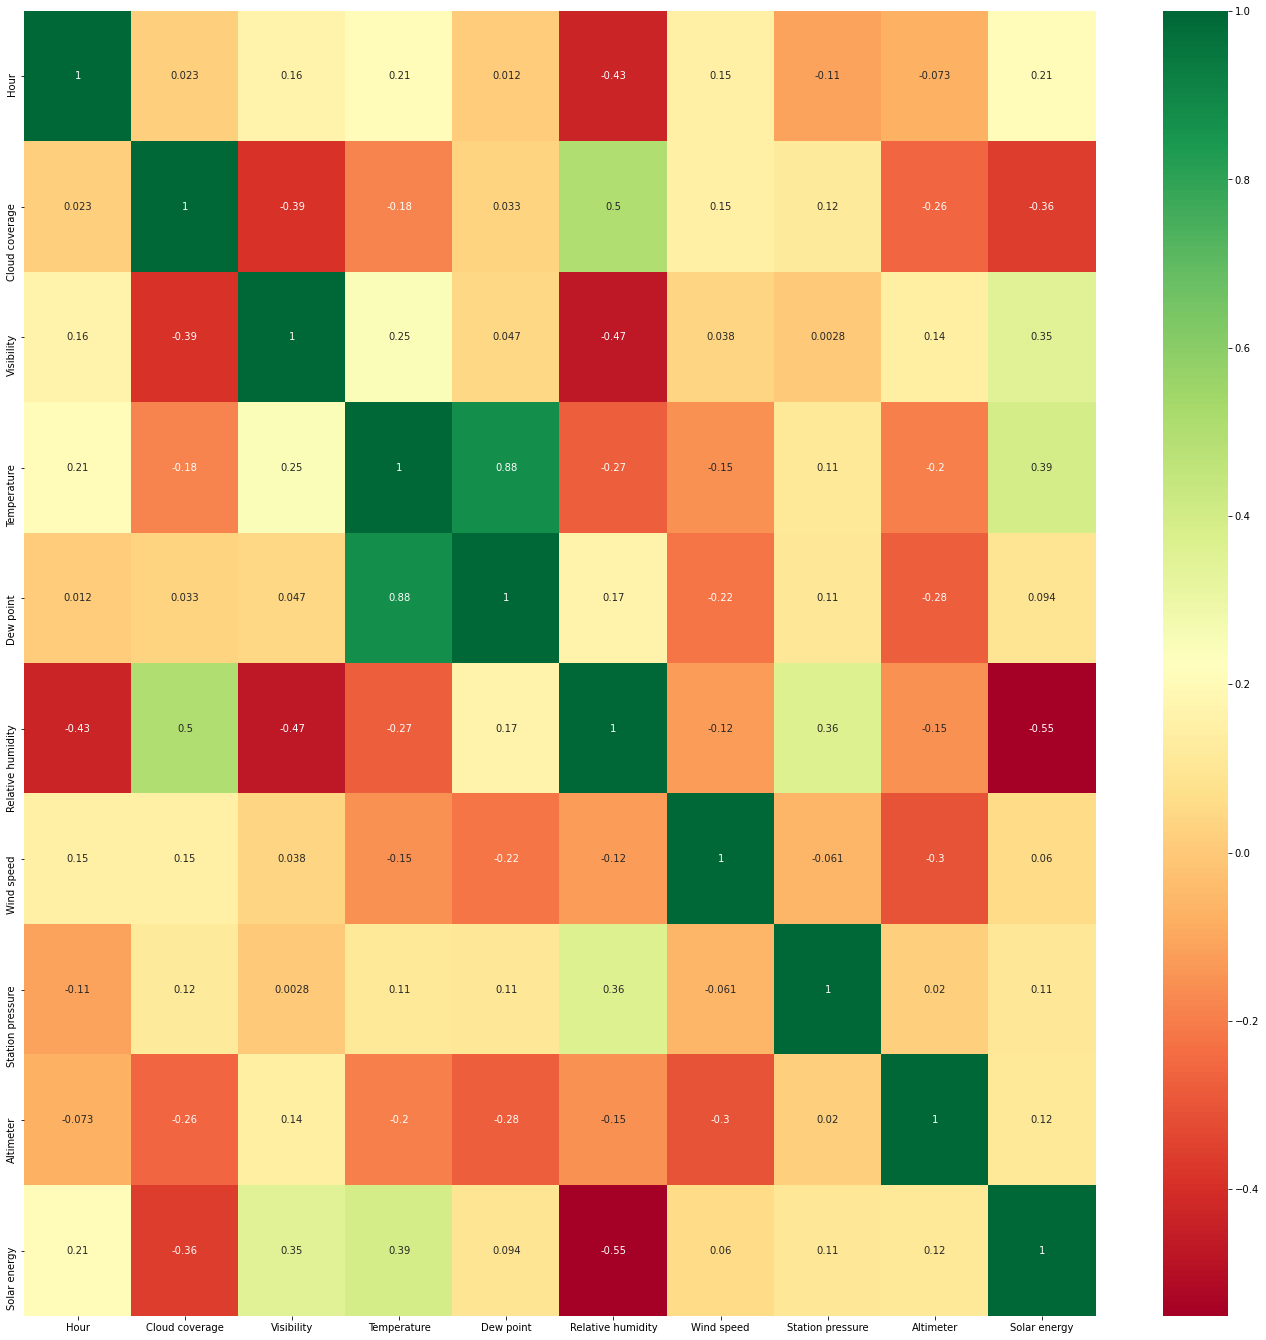

In [21]:
cor=df.corr()
t_cor=cor.index
plt.figure(figsize=(24,24))
sns.heatmap(df[t_cor].corr(),annot=True,cmap="RdYlGn")

In [23]:
df.corr()['Solar energy']

Hour                 0.205580
Cloud coverage      -0.361978
Visibility           0.346738
Temperature          0.390454
Dew point            0.094372
Relative humidity   -0.550369
Wind speed           0.060179
Station pressure     0.108951
Altimeter            0.115301
Solar energy         1.000000
Name: Solar energy, dtype: float64

In [46]:
df

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
1,2016-02-01,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
2,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
3,2016-02-01,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
4,2016-02-01,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75
...,...,...,...,...,...,...,...,...,...,...,...
7531,2017-10-28,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93,945.75
7532,2017-10-28,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93,728.50
7533,2017-10-28,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93,338.50
7534,2017-10-28,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95,126.78


In [49]:
Y=df.iloc[:,-1]
# X=df.drop('Solar energy',inplace=True, axis=1)
X=df.iloc[:,:-1]

In [54]:
X.drop('Date',inplace=True,axis=1)

In [55]:
X

,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter
0,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98
1,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99
2,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01
3,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04
4,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06
...,...,...,...,...,...,...,...,...,...
7531,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93
7532,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93
7533,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93
7534,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95


In [52]:
Y

0          0.00
1         84.29
2        531.00
3        923.75
4       1947.75
         ...   
7531     945.75
7532     728.50
7533     338.50
7534     126.78
7535      20.49
Name: Solar energy, Length: 7536, dtype: float64

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [57]:
model.feature_importances_

array([0.34719141, 0.14661234, 0.02247511, 0.06956781, 0.04321303,
       0.24257265, 0.03740384, 0.05946951, 0.03149431])

In [58]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [59]:
X_train.shape

(5652, 9)

In [60]:
X

,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter
0,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98
1,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99
2,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01
3,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04
4,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06
...,...,...,...,...,...,...,...,...,...
7531,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93
7532,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93
7533,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93
7534,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95


In [61]:
y_train.shape

(5652,)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
n_e=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_f=['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [65]:
random_grid = {'n_estimators': n_e,
               'max_features': max_f,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [66]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [67]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [68]:
rf_rcv=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [69]:
rf_rcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  18.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
pred=rf_rcv.predict(X_test)

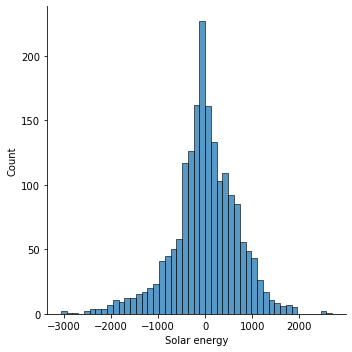

In [71]:
sns.displot(y_test-pred)

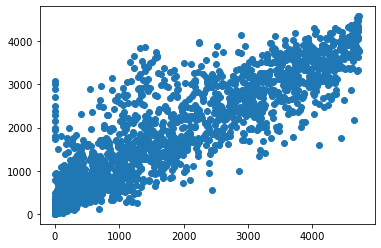

In [72]:
plt.scatter(y_test,pred)

In [73]:
import pickle 
file =open('rfmodel.pkl','wb')

pickle.dump(rf_rcv,file)

In [74]:
from sklearn import metrics

In [75]:
metrics.r2_score(y_test, pred)

0.7775044983047481

In [76]:
print(rf_rcv.best_estimator_)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gb = GradientBoostingRegressor()



learning_rate = [0.001, 0.01, 0.1, 0.2]


n_estimators=list(range(500,1000,100))

max_depth=list(range(4,9,4))

min_samples_split=list(range(4,9,2))

min_samples_leaf=[1,2,5,7]

max_features=['auto','sqrt']

param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [79]:
gb_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]})

In [80]:
pred=gb_rs.predict(X_test)

In [81]:
metrics.r2_score(y_test, pred)

0.7855505262319216

In [82]:
gb_rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features='sqrt',
                          min_samples_split=4, n_estimators=900)

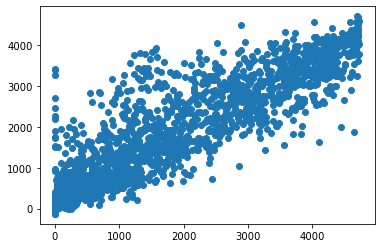

In [83]:
plt.scatter(y_test,pred)

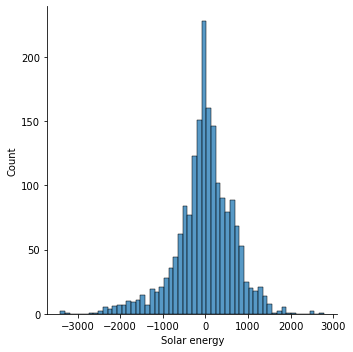

In [84]:
sns.displot(y_test-pred)

In [85]:
import pickle 
file =open('gbr.pkl','wb')

pickle.dump(gb_rs,file)